In [2]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data = pd.read_csv('EQ.csv')

In [8]:
data.shape

(324, 62)

In [9]:
data.head()

,ck_oo_numberOfPrivateMethods,LDHH_lcom,LDHH_fanIn,numberOfNonTrivialBugsFoundUntil:,WCHU_numberOfPublicAttributes,WCHU_numberOfAttributes,CvsWEntropy,LDHH_numberOfPublicMethods,WCHU_fanIn,LDHH_numberOfPrivateAttributes,...,LDHH_fanOut,LDHH_numberOfMethodsInherited,LDHH_rfc,ck_oo_numberOfMethodsInherited,ck_oo_numberOfPublicMethods,LDHH_cbo,WCHU_numberOfLinesOfCode,CvsExpEntropy,LDHH_numberOfMethods,class
0,3,0.002547,0.002555,4,0.00,3.04,0.393707,0.003049,1.01,0.004091,...,0.005627,0.000000,0.004406,8,8,0.008431,3.50,0.103594,0.003611,buggy
1,37,0.008643,0.004756,71,0.00,14.37,2.093750,0.001481,2.02,0.015332,...,0.018761,0.001486,0.060301,7,7,0.021602,43.12,0.328692,0.009906,buggy
2,3,0.001479,0.009143,5,1.01,3.08,0.484675,0.000000,6.17,0.001953,...,0.003117,0.001486,0.002325,7,2,0.011859,4.68,0.125841,0.001655,clean
3,10,0.005642,0.005395,38,0.00,1.06,0.811584,0.000876,6.07,0.000739,...,0.020376,0.002338,0.030608,17,10,0.020478,24.06,0.170416,0.007000,buggy
4,1,0.001350,0.000000,1,1.01,1.01,0.031940,0.000876,0.00,0.000000,...,0.000566,0.003017,0.001492,22,7,0.000652,2.13,0.055912,0.001572,buggy


In [10]:
def handle_non_numeric_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_values = {}
        
        def convert_to_int(val):
            return text_digit_values[val]
        
        if(df[column].dtype != np.int64 and df[column].dtype != np.float64):
            column_elements = df[column].values.tolist()
            unique_elements = set(column_elements)
            
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_values:
                    text_digit_values[unique] = x
                    x += 1
            
            df[column] = list(map(convert_to_int, df[column]))
    
    return df

data = handle_non_numeric_data(data)
print(data.head())


   ck_oo_numberOfPrivateMethods  LDHH_lcom  LDHH_fanIn  \
0                             3   0.002547    0.002555   
1                            37   0.008643    0.004756   
2                             3   0.001479    0.009143   
3                            10   0.005642    0.005395   
4                             1   0.001350    0.000000   

   numberOfNonTrivialBugsFoundUntil:  WCHU_numberOfPublicAttributes  \
0                                  4                           0.00   
1                                 71                           0.00   
2                                  5                           1.01   
3                                 38                           0.00   
4                                  1                           1.01   

   WCHU_numberOfAttributes  CvsWEntropy  LDHH_numberOfPublicMethods  \
0                     3.04     0.393707                    0.003049   
1                    14.37     2.093750                    0.001481   
2          

In [11]:
array = data.values
Z = array[:,0:61]
Y = array[:,61]

In [12]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=4)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = tree.DecisionTreeClassifier()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

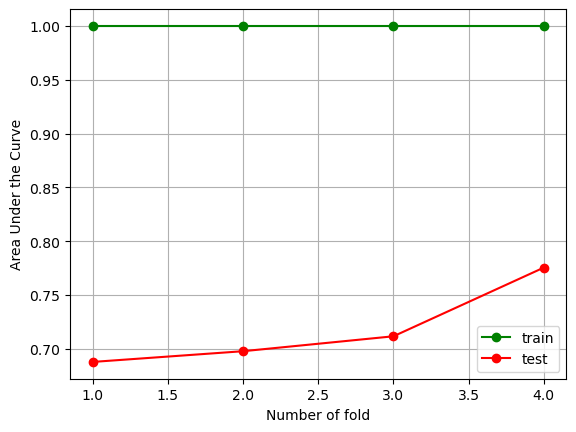

In [14]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [15]:
from sklearn.model_selection import RandomizedSearchCV
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
max_features = ['auto', 'sqrt','log2']
random_grid = {'splitter': splitter,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':criterion}
print(random_grid)

{'splitter': ['best', 'random'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['gini', 'entropy']}


In [16]:
dt_randomcv=RandomizedSearchCV(estimator=model,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100)
dt_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=entropy, max_depth=560, max_features=auto, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=560, max_features=auto, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=560, max_features=auto, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=560, max_features=auto, min_samples_leaf=8, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=560, max_features=auto, min_samples_leaf=8, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=560, max_features=auto, min_samples_leaf=8, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=120, max_features=log2, min_samples_leaf=6, min_samples_split=14, splitter=random; tot

[CV] END criterion=entropy, max_depth=1000, max_features=auto, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=1000, max_features=auto, min_samples_leaf=6, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=670, max_features=auto, min_samples_leaf=4, min_samples_split=14, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=670, max_features=auto, min_samples_leaf=4, min_samples_split=14, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=670, max_features=auto, min_samples_leaf=4, min_samples_split=14, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=890, max_features=log2, min_samples_leaf=8, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=890, max_features=log2, min_samples_leaf=8, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=890

[CV] END criterion=entropy, max_depth=1000, max_features=auto, min_samples_leaf=6, min_samples_split=14, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=230, max_features=log2, min_samples_leaf=8, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=230, max_features=log2, min_samples_leaf=8, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=230, max_features=log2, min_samples_leaf=8, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=780, max_features=log2, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=entropy, max_depth=670, max_fe

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'splitter': ['best', 'random']},
                   random_state=100, verbose=2)

In [17]:
dt_randomcv.best_params_

{'splitter': 'random',
 'min_samples_split': 14,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini'}

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(Z, Y, test_size = 0.3, random_state = 0)

model.fit(X_train, y_train)

y_predict_training = model.predict(X_train)
y_pred = model.predict(X_test)
#summery of training accuracy by the classifier
print("Decision Tree Algorithm in training")
print(classification_report(y_train, y_predict_training))
print(confusion_matrix(y_train, y_predict_training))
print("ACC: ",accuracy_score(y_train, y_predict_training))

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
print("ACC: ",accuracy_score(y_pred,y_test))

Decision Tree Algorithm in training
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       140

    accuracy                           1.00       226
   macro avg       1.00      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226

[[ 86   0]
 [  0 140]]
ACC:  1.0
Decision Tree Algorithm
              precision    recall  f1-score   support

         0.0       0.65      0.56      0.60        43
         1.0       0.69      0.76      0.72        55

    accuracy                           0.67        98
   macro avg       0.67      0.66      0.66        98
weighted avg       0.67      0.67      0.67        98

[[24 19]
 [13 42]]
ACC:  0.673469387755102


In [19]:
best_random_grid = dt_randomcv.best_estimator_
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[27 16]
 [ 6 49]]
Accuracy Score 0.7755102040816326
Classification report:               precision    recall  f1-score   support

         0.0       0.82      0.63      0.71        43
         1.0       0.75      0.89      0.82        55

    accuracy                           0.78        98
   macro avg       0.79      0.76      0.76        98
weighted avg       0.78      0.78      0.77        98



In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [dt_randomcv.best_params_['criterion']],
    'max_depth': [dt_randomcv.best_params_['max_depth']],
    'splitter': [dt_randomcv.best_params_['splitter']],
    'max_features': [dt_randomcv.best_params_['max_features']],
    'min_samples_leaf': [dt_randomcv.best_params_['min_samples_leaf'], 
                         dt_randomcv.best_params_['min_samples_leaf']+2, 
                         dt_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [dt_randomcv.best_params_['min_samples_split'] - 2,
                          dt_randomcv.best_params_['min_samples_split'] - 1,
                          dt_randomcv.best_params_['min_samples_split'], 
                          dt_randomcv.best_params_['min_samples_split'] +1,
                          dt_randomcv.best_params_['min_samples_split'] + 2]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [10], 'splitter': ['random'], 'max_features': ['sqrt'], 'min_samples_leaf': [4, 6, 8], 'min_samples_split': [12, 13, 14, 15, 16]}


In [21]:
dt = tree.DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=dt,param_grid=param_grid,cv=10,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=12, splitter=random; tota

[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=16, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=16, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=16, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=16, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=16, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=16, splitter=random; total time=   0.0s


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [10],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [4, 6, 8],
                         'min_samples_split': [12, 13, 14, 15, 16],
                         'splitter': ['random']},
             verbose=2)

In [22]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=8,
                       min_samples_split=12, splitter='random')

In [24]:
best_grid = grid_search.best_estimator_

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
y_train_pred = best_grid.predict(X_train)
y_pred=best_grid.predict(X_test)
print("Dectsion Tree Training Result")
print(confusion_matrix(y_train,y_train_pred))
print("Auc Score {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_train,y_train_pred)))
print("Classification report: {}".format(classification_report(y_train,y_train_pred)))

print("Decision Tree Testing Result")
print(confusion_matrix(y_test,y_pred))
print("Auc Score {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Dectsion Tree Training Result
[[  0  86]
 [  0 140]]
Auc Score 0.5
Accuracy Score 0.6194690265486725
Classification report:               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        86
         1.0       0.62      1.00      0.77       140

    accuracy                           0.62       226
   macro avg       0.31      0.50      0.38       226
weighted avg       0.38      0.62      0.47       226

Decision Tree Testing Result
[[ 0 43]
 [ 0 55]]
Auc Score 0.5
Accuracy Score 0.5612244897959183
Classification report:               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        43
         1.0       0.56      1.00      0.72        55

    accuracy                           0.56        98
   macro avg       0.28      0.50      0.36        98
weighted avg       0.31      0.56      0.40        98



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classif

In [26]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=5)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = best_grid
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

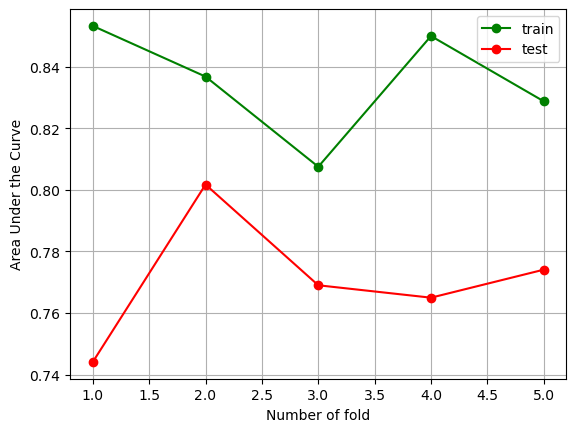

In [27]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [28]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1500)

In [29]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=4)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = LogisticRegression(solver='lbfgs', max_iter=1500)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

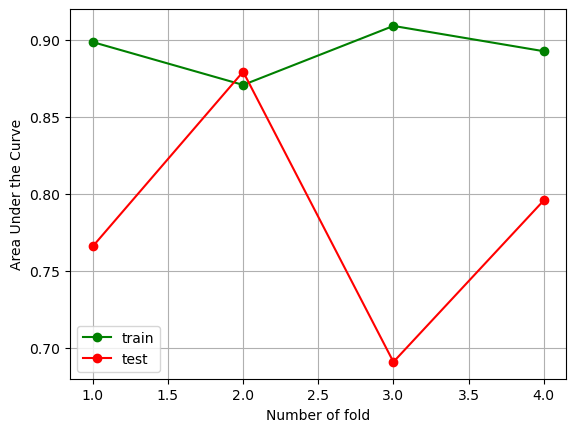

In [30]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(Z, Y, test_size = 0.3, random_state = 0)

model.fit(X_train, y_train)

y_predict_training = model.predict(X_train)
y_pred = model.predict(X_test)
#summery of training accuracy by the classifier
print("Logistic Regression Algorithm in training")
print(classification_report(y_train, y_predict_training))
print(confusion_matrix(y_train, y_predict_training))
print("ACC: ",accuracy_score(y_train, y_predict_training))
print("AUC: ",roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))

#Summary of the predictions made by the classifier
print("Logistic Regression Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
print("ACC: ",accuracy_score(y_pred,y_test))
print("AUC: ",roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

Logistic Regression Algorithm in training
              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76        86
         1.0       0.84      0.89      0.87       140

    accuracy                           0.83       226
   macro avg       0.82      0.81      0.81       226
weighted avg       0.83      0.83      0.83       226

[[ 62  24]
 [ 15 125]]
ACC:  0.827433628318584
AUC:  0.9044019933554818
Logistic Regression Algorithm
              precision    recall  f1-score   support

         0.0       0.71      0.58      0.64        43
         1.0       0.71      0.82      0.76        55

    accuracy                           0.71        98
   macro avg       0.71      0.70      0.70        98
weighted avg       0.71      0.71      0.71        98

[[25 18]
 [10 45]]
ACC:  0.7142857142857143
AUC:  0.7420718816067653


In [33]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1500)

In [34]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
C = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]
fit_intercept = [True, False]
# class_weight = ['balanced','None']
max_iter = [int(x) for x in np.linspace(1000, 3000, 10)]
multi_class = ['auto', 'ovr', 'multinomial'] 

random_grid = {
    'penalty': penalty,
    'solver' : solver,
    'C':C,
    'fit_intercept':fit_intercept,
#     'class_weight':class_weight,
    'max_iter':max_iter,
    'multi_class':multi_class
}
print(random_grid)

{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'C': [1000, 100, 10, 1.0, 0.1, 0.01, 0.001], 'fit_intercept': [True, False], 'max_iter': [1000, 1222, 1444, 1666, 1888, 2111, 2333, 2555, 2777, 3000], 'multi_class': ['auto', 'ovr', 'multinomial']}


In [35]:
lr = LogisticRegression()
lr_randomcv=RandomizedSearchCV(estimator=lr,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=555)
lr_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END C=0.1, fit_intercept=False, max_iter=2555, multi_class=multinomial, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=2555, multi_class=multinomial, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=2555, multi_class=multinomial, penalty=l1, solver=newton-cg; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=2555, multi_class=auto, penalty=none, solver=lbfgs; total time=   0.4s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=2555, multi_class=auto, penalty=none, solver=lbfgs; total time=   0.4s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.01, fit_intercept=False, max_iter=2555, multi_class=auto, penalty=none, solver=lbfgs; total time=   0.6s
[CV] END C=10, fit_intercept=False, max_iter=2333, multi_class=ovr, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=2333, multi_class=ovr, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=2333, multi_class=ovr, penalty=none, solver=liblinear; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=100, fit_intercept=True, max_iter=1888, multi_class=auto, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=1888, multi_class=auto, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=1888, multi_class=auto, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=2333, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=2333, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=2333, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=2111, multi_class=ovr, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=2111, multi_cla

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=none, solver=saga; total time=   0.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=none, solver=saga; total time=   0.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=none, solver=saga; total time=   0.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=none, solver=saga; total time=   0.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=none, solver=saga; total time=   0.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=none, solver=saga; total time=   0.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=none, solver=lbfgs; total time=   0.4s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=none, solver=lbfgs; total time=   0.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=none, solver=lbfgs; total time=   0.5s
[CV] END C=100, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=False, max_iter=2555, multi_class=auto, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, fit_intercept=False, max_iter=2555, multi_class=auto, pena

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=none, solver=lbfgs; total time=   0.6s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=none, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=none, solver=lbfgs; total time=   0.7s
[CV] END C=1.0, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=ovr, penalty=none, solver=lbfgs; total time=   0.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=ovr, penalty=none, solver=lbfgs; total time=   0.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=ovr, penalty=none, solver=lbfgs; total time=   0.3s
[CV] END C=10, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=1666, multi_class=auto, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=1666, multi_class=auto, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=1666, multi_class=auto, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=2777, multi_class=auto, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=True, max_iter=2777, mul

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=1444, multi_class=ovr, penalty=l1, solver=saga; total time=   0.3s
[CV] END C=1.0, fit_intercept=False, max_iter=2777, multi_class=multinomial, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=False, max_iter=2777, multi_class=multinomial, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=False, max_iter=2777, multi_class=multinomial, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=1444, multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=1444, multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=1444, multi_class=ovr, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, fit

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.0, fit_intercept=False, max_iter=2777, multi_class=auto, penalty=l2, solver=sag; total time=   0.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.0, fit_intercept=False, max_iter=2777, multi_class=auto, penalty=l2, solver=sag; total time=   0.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1.0, fit_intercept=False, max_iter=2777, multi_class=auto, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=0.001, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=1222, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=1222, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=1222, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=2333, multi_class=ovr, penalty=none, solver=sag; total time=   0.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=2333, multi_class=ovr, penalty=none, solver=sag; total time=   0.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.01, fit_intercept=True, max_iter=2333, multi_class=ovr, penalty=none, solver=sag; total time=   0.2s
[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=3000, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=3000, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=3000, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.0, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=none, solver=sag; total time=   0.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.0, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=none, solver=sag; total time=   0.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.0, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=none, solver=sag; total time=   0.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.001, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=l2, solver=saga; total time=   0.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.001, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=l2, solver=saga; total time=   0.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.001, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=l2, solver=saga; total time=   0.2s


C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] END C=10, fit_intercept=True, max_iter=2777, multi_class=auto, penalty=none, solver=newton-cg; total time=   9.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSear

[CV] END C=10, fit_intercept=True, max_iter=2777, multi_class=auto, penalty=none, solver=newton-cg; total time=   7.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=2777, multi_class=auto, penalty=none, solver=newton-cg; total time=   5.1s
[CV] END C=1.0, fit_intercept=False, max_iter=1888, multi_class=ovr, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, fit_intercept=False, max_iter=1888, multi_class=ovr, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, fit_intercept=False, max_iter=1888, multi_class=ovr, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=2777, multi_class=multinomial, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=2777, multi_class=multinomial, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=2777, multi_class=multinomial, penalty=elasticnet, solver=liblinear; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=none, solver=sag; total time=   0.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=none, solver=sag; total time=   0.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=none, solver=sag; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=2777, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=1000, fit_intercept=False, max_iter=2777, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=2777, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=2555, multi_class=multinomial, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, ma

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=l2, solver=sag; total time=   0.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=l2, solver=sag; total time=   0.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=2333, multi_class=auto, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=100, fit_intercept=False, max_iter=3000, multi_class=multinomial, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=3000, multi_class=multinomial, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, fit_intercept=False, max_iter=3000, multi_class=multinomial, penalty=elasticnet, solver=lbfgs; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=1.0, fit_intercept=False, max_iter=2111, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   0.4s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=1.0, fit_intercept=False, max_iter=2111, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   0.5s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1.0, fit_intercept=False, max_iter=2111, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   0.4s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=3000, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   0.8s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=3000, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   0.7s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=0.1, fit_intercept=True, max_iter=3000, multi_class=multinomial, penalty=none, solver=lbfgs; total time=   0.7s
[CV] END C=0.1, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1222, multi_class=ovr, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1222, multi_class=ovr, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1222, multi_class=ovr, penalty=l1, solver=sag; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=100, fit_intercept=True, max_iter=1444, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END C=100, fit_intercept=True, max_iter=1444, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, fit_intercept=True, max_iter=1444, multi_class=multinomial, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=1000, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=none, solver=newton-cg; total time=   4.4s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSear

[CV] END C=1000, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=none, solver=newton-cg; total time=   3.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=none, solver=newton-cg; total time=   4.3s
[CV] END C=1000, fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=1000, multi_class=multinomial, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=1000, multi_class=ovr, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=1000, multi_class=ovr, penalty=l2, solver=sag; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1.0, fit_intercept=True, max_iter=1000, multi_class=ovr, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=1222, multi_class=multinomial, penalty=none, solver=sag; total time=   0.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=1222, multi_class=multinomial, penalty=none, solver=sag; total time=   0.1s
[CV] END C=1000, fit_intercept=True, max_iter=1222, multi_class=multinomial, penalty=none, solver=sag; total time=   0.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=1444, multi_class=auto, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1000, fit_intercept=True, max_iter=1444, multi_class=auto, penalty=l2, solver=saga; total time=   0.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=1444, multi_class=auto, penalty=l2, solver=saga; total time=   0.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=1888, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=1888, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=10, fit_intercept=False, max_iter=1888, multi_class=multinomial, penalty=l1, solver=saga; total time=   0.4s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=2555, multi_class=multinomial, penalty=none, solver=saga; total time=   0.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=2555, multi_class=multinomial, penalty=none, solver=saga; total time=   0.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=2555, multi_class=multinomial, penalty=none, solver=saga; total time=   0.3s
[CV] END C=0.1, fit_intercept=True, max_iter=1000, multi_class=ovr, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=1000, multi_class=ovr, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=1000, multi_class=ovr, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=1.0, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=1.0, fit_intercept=True, max_iter=1888, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.1, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=none, solver=sag; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=1222, multi_class=ovr, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=1444, multi_class=auto, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=1444, multi_class=auto, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=1444, multi_class=auto, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=3000, multi_class=ovr, penalty=none, solver=lbfgs; total time=   0.5s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=3000, multi_class=ovr, penalty=none, solver=lbfgs; total time=   0.5s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=3000, multi_class=ovr, penalty=none, solver=lbfgs; total time=   0.5s
[CV] END C=0.001, fit_intercept=False, max_iter=2333, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=2333, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.001, fit_intercept=False, max_iter=2333, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=2111, multi_class=auto, penalty=none, solver=saga; total time=   0.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=2111, multi_class=auto, penalty=none, solver=saga; total time=   0.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=True, max_iter=2111, multi_class=auto, penalty=none, solver=saga; total time=   0.1s
[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=1000, multi_class=multinomial, penalty=l1, solver=newton-cg; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=1222, multi_class=auto, penalty=none, solver=newton-cg; total time=   3.4s


C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] END C=0.01, fit_intercept=False, max_iter=1222, multi_class=auto, penalty=none, solver=newton-cg; total time=   3.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END C=0.01, fit_intercept=False, max_iter=1222, multi_class=auto, penalty=none, solver=newton-cg; total time=   2.7s
[CV] END C=1.0, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=2333, multi_class=multinomial, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=2333, multi_class=multinomial, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=2333, multi_class=multinomial, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000, fit_intercept=False, max_iter=1444, multi_class=multinomial, penalty=elasticnet, solver=sag; 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV] END C=0.1, fit_intercept=True, max_iter=3000, multi_class=auto, penalty=none, solver=newton-cg; total time=   8.4s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSear

[CV] END C=0.1, fit_intercept=True, max_iter=3000, multi_class=auto, penalty=none, solver=newton-cg; total time=   8.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.1, fit_intercept=True, max_iter=3000, multi_class=auto, penalty=none, solver=newton-cg; total time=   5.0s
[CV] END C=0.1, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=none, solver=lbfgs; total time=   0.1s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STO

[CV] END C=0.1, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=none, solver=lbfgs; total time=   0.2s
[CV] END C=0.1, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.01, fit_intercept=False, max_iter=2111, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=2111, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, fit_intercept=False, max_iter=2111, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=2555, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=2555, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=2555, multi_class=auto, penalty=elasticnet, solver=liblinear; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1.0, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=none, solver=saga; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1.0, fit_intercept=True, max_iter=1222, multi_class=auto, penalty=none, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=1888, multi_class=multinomial, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=2555, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=2555, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=1.0, fit_intercept=True, max_iter=2555, multi_class=multinomial, penalty=l1, solver=sag; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=none, solver=sag; total time=   0.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=none, solver=sag; total time=   0.2s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=1000, fit_intercept=False, max_iter=3000, multi_class=auto, penalty=none, solver=sag; total time=   0.2s
[CV] END C=10, fit_intercept=True, max_iter=2111, multi_class=multinomial, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=2111, multi_class=multinomial, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, fit_intercept=True, max_iter=2111, multi_class=multinomial, penalty=elasticnet, solver=saga; total time=   0.0s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=none, solver=lbfgs; total time=   0.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=100, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=none, solver=lbfgs; total time=   0.3s


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
153 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Trace

[CV] END C=100, fit_intercept=False, max_iter=1888, multi_class=auto, penalty=none, solver=lbfgs; total time=   0.3s
[CV] END C=10, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=2555, multi_class=ovr, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=1666, multi_class=auto, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=1666, multi_class=auto, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1000, fit_intercept=True, max_iter=1666, multi_class=auto, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=10, fit_intercept=False, max_iter=1888, multi_class=multinomial, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, fit_intercept=False, 

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': [1000, 100, 10, 1.0, 0.1, 0.01,
                                              0.001],
                                        'fit_intercept': [True, False],
                                        'max_iter': [1000, 1222, 1444, 1666,
                                                     1888, 2111, 2333, 2555,
                                                     2777, 3000],
                                        'multi_class': ['auto', 'ovr',
                                                        'multinomial'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   ra

In [36]:
lr_randomcv.best_params_

{'solver': 'lbfgs',
 'penalty': 'l2',
 'multi_class': 'ovr',
 'max_iter': 2111,
 'fit_intercept': True,
 'C': 0.1}

In [37]:
best_random_grid = lr_randomcv.best_estimator_
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[24 19]
 [10 45]]
Accuracy Score 0.7040816326530612
Classification report:               precision    recall  f1-score   support

         0.0       0.71      0.56      0.62        43
         1.0       0.70      0.82      0.76        55

    accuracy                           0.70        98
   macro avg       0.70      0.69      0.69        98
weighted avg       0.70      0.70      0.70        98



In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'solver':[lr_randomcv.best_params_['solver']],
    'penalty':[lr_randomcv.best_params_['penalty']],
    'multi_class':[lr_randomcv.best_params_['multi_class']],
    'max_iter':[
        lr_randomcv.best_params_['max_iter']-100,
        lr_randomcv.best_params_['max_iter']-50,
        lr_randomcv.best_params_['max_iter'],
        lr_randomcv.best_params_['max_iter']+100,
        lr_randomcv.best_params_['max_iter']+50,
        lr_randomcv.best_params_['max_iter']+120
    ],
    'fit_intercept':[lr_randomcv.best_params_['fit_intercept']],
    'C':[
        lr_randomcv.best_params_['C']-0.0009,
        lr_randomcv.best_params_['C']-0.0005,
        lr_randomcv.best_params_['C']+0.005,
        lr_randomcv.best_params_['C']+0.0009
    ]
}

print(param_grid)

{'solver': ['lbfgs'], 'penalty': ['l2'], 'multi_class': ['ovr'], 'max_iter': [2011, 2061, 2111, 2211, 2161, 2231], 'fit_intercept': [True], 'C': [0.09910000000000001, 0.0995, 0.10500000000000001, 0.1009]}


In [39]:
lr = LogisticRegression()
grid_search=GridSearchCV(estimator=lr,param_grid=param_grid,cv=10,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=0.09910000000000001, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=0.09910000000000001, fi

[CV] END C=0.0995, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=0.0995, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END C=0.0995, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.0995, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.0995, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.0995, fit_intercept=True, max_iter=2011, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.0995, fit_intercept=True, max_iter=2061, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.0995, fit_intercept=True, max_iter=2061, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.0995, fit_intercept=True, max_iter=2061, multi_class=ovr, p

[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=2061, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=2061, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=2061, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=2061, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=2061, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=2061, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=0.10500000000000001, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, s

[CV] END C=0.1009, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.1009, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=0.1009, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=0.1009, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.1009, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=0.1009, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=0.1009, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.1009, fit_intercept=True, max_iter=2111, multi_class=ovr, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.1009, fit_intercept=True, max_iter=2111, multi_class=ovr, p

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.09910000000000001, 0.0995, 0.10500000000000001,
                               0.1009],
                         'fit_intercept': [True],
                         'max_iter': [2011, 2061, 2111, 2211, 2161, 2231],
                         'multi_class': ['ovr'], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             verbose=2)

In [40]:
best_grid = grid_search.best_estimator_
best_grid

LogisticRegression(C=0.09910000000000001, max_iter=2011, multi_class='ovr')

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score
y_train_pred = best_grid.predict(X_train)
y_pred=best_grid.predict(X_test)
print("Logistic Regression Training Result")
print(confusion_matrix(y_train,y_train_pred))
print("Auc Score {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_train,y_train_pred)))
print("Classification report: {}".format(classification_report(y_train,y_train_pred)))

print("Logistic Regression Testing Result")
print(confusion_matrix(y_test,y_pred))
print("Auc Score {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Logistic Regression Training Result
[[ 69  31]
 [ 20 123]]
Auc Score 0.8826573426573426
Accuracy Score 0.7901234567901234
Classification report:               precision    recall  f1-score   support

         0.0       0.78      0.69      0.73       100
         1.0       0.80      0.86      0.83       143

    accuracy                           0.79       243
   macro avg       0.79      0.78      0.78       243
weighted avg       0.79      0.79      0.79       243

Logistic Regression Testing Result
[[17 12]
 [10 42]]
Auc Score 0.8216180371352786
Accuracy Score 0.7283950617283951
Classification report:               precision    recall  f1-score   support

         0.0       0.63      0.59      0.61        29
         1.0       0.78      0.81      0.79        52

    accuracy                           0.73        81
   macro avg       0.70      0.70      0.70        81
weighted avg       0.72      0.73      0.73        81



In [45]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=4)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = best_grid
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

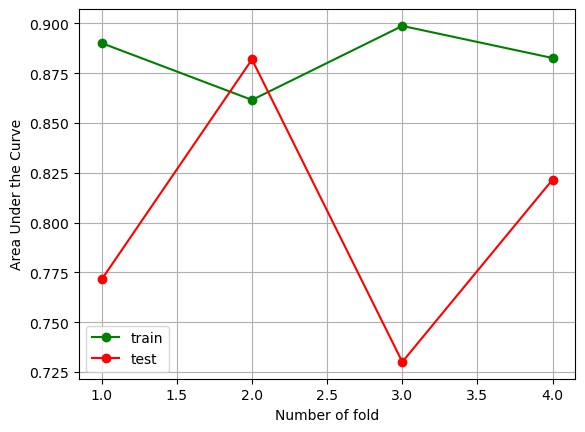

In [46]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [47]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [48]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=4)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = KNeighborsClassifier( n_neighbors=2)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

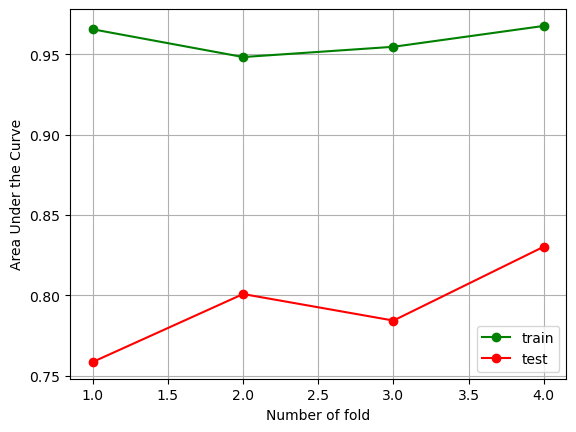

In [49]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(Z, Y, test_size = 0.3, random_state = 0)

model.fit(X_train, y_train)

y_predict_training = model.predict(X_train)
y_pred = model.predict(X_test)
#summery of training accuracy by the classifier
print("Logistic Regression Algorithm in training")
print(classification_report(y_train, y_predict_training))
print(confusion_matrix(y_train, y_predict_training))
print("ACC: ",accuracy_score(y_train, y_predict_training))
print("AUC: ",roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
print("ACC: ",accuracy_score(y_pred,y_test))
print("AUC: ",roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

Logistic Regression Algorithm in training
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85        86
         1.0       1.00      0.78      0.88       140

    accuracy                           0.86       226
   macro avg       0.87      0.89      0.86       226
weighted avg       0.90      0.86      0.86       226

[[ 86   0]
 [ 31 109]]
ACC:  0.8628318584070797
AUC:  0.9497923588039867
Decision Tree Algorithm
              precision    recall  f1-score   support

         0.0       0.67      0.84      0.74        43
         1.0       0.84      0.67      0.75        55

    accuracy                           0.74        98
   macro avg       0.75      0.75      0.74        98
weighted avg       0.76      0.74      0.75        98

[[36  7]
 [18 37]]
ACC:  0.7448979591836735
AUC:  0.7816067653276956


C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [52]:
n_neighbors = [5,7,9,11,13,15]
weights = ['uniform','distance']
metric = ['minkowski','euclidean','manhattan']
random_grid = {
    'n_neighbors' : n_neighbors,
    'weights' : weights,
    'metric' : metric
}
print(random_grid)

{'n_neighbors': [5, 7, 9, 11, 13, 15], 'weights': ['uniform', 'distance'], 'metric': ['minkowski', 'euclidean', 'manhattan']}


In [56]:
from sklearn.model_selection import RandomizedSearchCV
knn_randomcv=RandomizedSearchCV(estimator=knn,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=55)
knn_randomcv.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it 

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ...metric=minkowski, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=7, weights=distance; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=7, wei

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END ..metric=minkowski, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ..metric=minkowski, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END .metric=minkowski, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END .metric=minkowski, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END .metric=minkowski, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

[CV] END ..metric=euclidean, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=15, weights=uniform; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END .metric=euclidean, n_neighbors=15, weights=distance; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=5, weights=distance; total time=   0.0s
[CV] END ...metric=manhattan, n_neighbors=7, weights=uniform; total time=   0.0s
[CV] END ...metric=manhattan

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   random_state=55, verbose=2)

In [57]:
knn_randomcv.best_params_

{'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}

In [58]:
best_random_grid = knn_randomcv.best_estimator_
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[26 17]
 [11 44]]
Accuracy Score 0.7142857142857143
Classification report:               precision    recall  f1-score   support

         0.0       0.70      0.60      0.65        43
         1.0       0.72      0.80      0.76        55

    accuracy                           0.71        98
   macro avg       0.71      0.70      0.70        98
weighted avg       0.71      0.71      0.71        98



In [59]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'weights' : [knn_randomcv.best_params_['weights']],
    'metric' : [knn_randomcv.best_params_['metric']],
    'n_neighbors' : [
        knn_randomcv.best_params_['n_neighbors']-2,
        knn_randomcv.best_params_['n_neighbors']-1,
        knn_randomcv.best_params_['n_neighbors'],
        knn_randomcv.best_params_['n_neighbors']+2,
        knn_randomcv.best_params_['n_neighbors']+1,
    ]
}

print(param_grid)

{'weights': ['distance'], 'metric': ['manhattan'], 'n_neighbors': [3, 4, 5, 7, 6]}


In [60]:
knn = KNeighborsClassifier()
grid_search=GridSearchCV(estimator=knn,param_grid=param_grid,cv=10,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=4, weights=distance; total time=   0.0s
[CV] END ..metric=manhattan, n_neighbors=4, weig

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan'],
                         'n_neighbors': [3, 4, 5, 7, 6],
                         'weights': ['distance']},
             verbose=2)

In [61]:
best_grid = grid_search.best_estimator_
best_grid

KNeighborsClassifier(metric='manhattan', n_neighbors=7, weights='distance')

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score
y_train_pred = best_grid.predict(X_train)
y_pred=best_grid.predict(X_test)
print("KNN Training Result")
print(confusion_matrix(y_train,y_train_pred))
print("Auc Score {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_train,y_train_pred)))
print("Classification report: {}".format(classification_report(y_train,y_train_pred)))

print("KNN Testing Result")
print(confusion_matrix(y_test,y_pred))
print("Auc Score {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

KNN Training Result
[[ 86   0]
 [  0 140]]
Auc Score 1.0
Accuracy Score 1.0
Classification report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       1.00      1.00      1.00       140

    accuracy                           1.00       226
   macro avg       1.00      1.00      1.00       226
weighted avg       1.00      1.00      1.00       226

KNN Testing Result
[[23 20]
 [13 42]]
Auc Score 0.7974630021141649
Accuracy Score 0.6632653061224489
Classification report:               precision    recall  f1-score   support

         0.0       0.64      0.53      0.58        43
         1.0       0.68      0.76      0.72        55

    accuracy                           0.66        98
   macro avg       0.66      0.65      0.65        98
weighted avg       0.66      0.66      0.66        98



In [63]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=5)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = best_grid
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

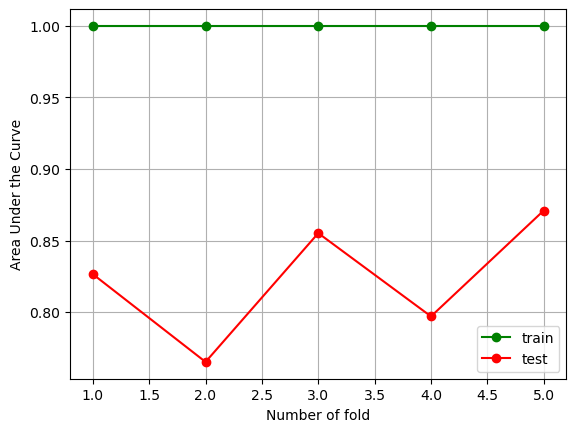

In [64]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [65]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(Z, Y, test_size = 0.3, random_state = 0)

model.fit(X_train, y_train)

y_predict_training = model.predict(X_train)
y_pred = model.predict(X_test)
#summery of training accuracy by the classifier
print("Logistic Regression Algorithm in training")
print(classification_report(y_train, y_predict_training))
print(confusion_matrix(y_train, y_predict_training))
print("ACC: ",accuracy_score(y_train, y_predict_training))
print("AUC: ",roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
print("ACC: ",accuracy_score(y_pred,y_test))
print("AUC: ",roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

Logistic Regression Algorithm in training
              precision    recall  f1-score   support

         0.0       0.75      0.49      0.59        86
         1.0       0.74      0.90      0.81       140

    accuracy                           0.74       226
   macro avg       0.75      0.69      0.70       226
weighted avg       0.74      0.74      0.73       226

[[ 42  44]
 [ 14 126]]
ACC:  0.7433628318584071
AUC:  0.8035714285714286
Decision Tree Algorithm
              precision    recall  f1-score   support

         0.0       0.83      0.56      0.67        43
         1.0       0.72      0.91      0.81        55

    accuracy                           0.76        98
   macro avg       0.78      0.73      0.74        98
weighted avg       0.77      0.76      0.75        98

[[24 19]
 [ 5 50]]
ACC:  0.7551020408163265
AUC:  0.7699788583509514


In [67]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=5)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

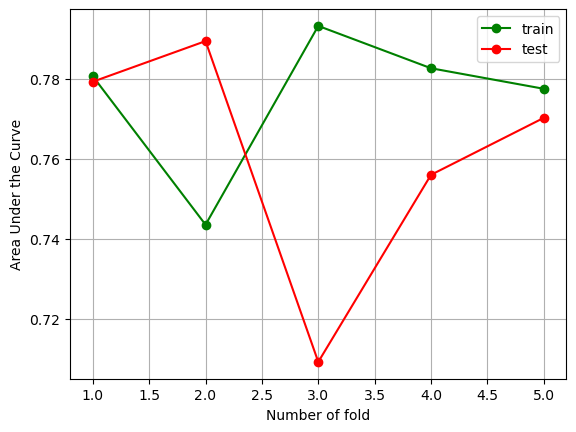

In [68]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [69]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [70]:
random_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
print(random_grid)

{'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
       1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
       6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
       2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
       1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
       5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
       2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
       1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
       4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
       1.87381742e-05, 1.51991108e-05, 1.23284674e-05, 1.00

In [71]:
from sklearn.model_selection import RandomizedSearchCV
nb_randomcv=RandomizedSearchCV(estimator=nb,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=555)
nb_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ....................var_smoothing=0.657933224657568; total time=   0.0s
[CV] END ....................var_smoothing=0.657933224657568; total time=   0.0s
[CV] END ....................var_smoothing=0.657933224657568; total time=   0.0s
[CV] END ....................var_smoothing=0.533669923120631; total time=   0.0s
[CV] END ....................var_smoothing=0.533669923120631; total time=   0.0s
[CV] END ....................var_smoothing=0.5

[CV] END ...............var_smoothing=1.5199110829529332e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.5199110829529332e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.2328467394420658e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.2328467394420658e-05; total time=   0.0s
[CV] END ...............var_smoothing=1.2328467394420658e-05; total time=   0.0s
[CV] END ................................var_smoothing=1e-05; total time=   0.0s
[CV] END ................................var_smoothing=1e-05; total time=   0.0s
[CV] END ................................var_smoothing=1e-05; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=8.111308307896873e-06; total time=   0.0s
[CV] END ................var_smoothing=6.579332246575683e-06; total time=   0.0s
[CV] END ................var

RandomizedSearchCV(cv=3, estimator=GaussianNB(), n_iter=100,
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.511191...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   random_state=555, verbose=2)

In [72]:
nb_randomcv.best_params_

{'var_smoothing': 5.336699231206302e-08}

In [73]:
best_random_grid = nb_randomcv.best_estimator_
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[ 9 12]
 [ 2 41]]
Accuracy Score 0.78125
Classification report:               precision    recall  f1-score   support

         0.0       0.82      0.43      0.56        21
         1.0       0.77      0.95      0.85        43

    accuracy                           0.78        64
   macro avg       0.80      0.69      0.71        64
weighted avg       0.79      0.78      0.76        64



In [74]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nb = GaussianNB()
grid_search=GridSearchCV(estimator=nb,param_grid=param_grid,cv=10,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.

[CV] END .................var_smoothing=0.012328467394420659; total time=   0.0s
[CV] END .................var_smoothing=0.012328467394420659; total time=   0.0s
[CV] END .................var_smoothing=0.012328467394420659; total time=   0.0s
[CV] END .................var_smoothing=0.012328467394420659; total time=   0.0s
[CV] END .................var_smoothing=0.012328467394420659; total time=   0.0s
[CV] END .................var_smoothing=0.012328467394420659; total time=   0.0s
[CV] END .................var_smoothing=0.012328467394420659; total time=   0.0s
[CV] END .................var_smoothing=0.012328467394420659; total time=   0.0s
[CV] END .................var_smoothing=0.012328467394420659; total time=   0.0s
[CV] END .................................var_smoothing=0.01; total time=   0.0s
[CV] END .................................var_smoothing=0.01; total time=   0.0s
[CV] END .................................var_smoothing=0.01; total time=   0.0s
[CV] END ...................

[CV] END ................var_smoothing=0.0008111308307896872; total time=   0.0s
[CV] END ................var_smoothing=0.0008111308307896872; total time=   0.0s
[CV] END ................var_smoothing=0.0008111308307896872; total time=   0.0s
[CV] END ................var_smoothing=0.0008111308307896872; total time=   0.0s
[CV] END ................var_smoothing=0.0008111308307896872; total time=   0.0s
[CV] END ................var_smoothing=0.0008111308307896872; total time=   0.0s
[CV] END ................var_smoothing=0.0008111308307896872; total time=   0.0s
[CV] END ................var_smoothing=0.0008111308307896872; total time=   0.0s
[CV] END ................var_smoothing=0.0008111308307896872; total time=   0.0s
[CV] END ................var_smoothing=0.0006579332246575676; total time=   0.0s
[CV] END ................var_smoothing=0.0006579332246575676; total time=   0.0s
[CV] END ................var_smoothing=0.0006579332246575676; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=4.328761281083062e-05; total time=   0.0s
[CV] END ................var_smoothing=4.328761281083062e-05; total time=   0.0s
[CV] END ................var_smoothing=3.511191734215127e-05; total time=   0.0s
[CV] END ................var_smoothing=3.511191734215127e-05; total time=   0.0s
[CV] END ................var_smoothing=3.511191734215127e-05; total time=   0.0s
[CV] END ................var_smoothing=3.511191734215127e-05; total time=   0.0s
[CV] END ................var_smoothing=3.511191734215127e-05; total time=   0.0s
[CV] END ................var_smoothing=3.511191734215127e-05; total time=   0.0s
[CV] END ................var_smoothing=3.511191734215127e-05; total time=   0.0s
[CV] END ................var_smoothing=3.511191734215127e-05; total time=   0.0s
[CV] END ................var_smoothing=3.511191734215127e-05; total time=   0.0s
[CV] END ................var_smoothing=3.511191734215127e-05; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-06; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=1.873817422860383e-07; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-07; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-07; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-07; total time=   0.0s
[CV] END ................var_smoothing=1.873817422860383e-07; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-07; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-07; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-07; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-07; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-07; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-07; total time=   0.0s
[CV] END ................var_smoothing=1.519911082952933e-07; total time=   0.0s
[CV] END ................var

[CV] END ................var_smoothing=1.232846739442066e-08; total time=   0.0s
[CV] END ................var_smoothing=1.232846739442066e-08; total time=   0.0s
[CV] END ................var_smoothing=1.232846739442066e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=2)

In [75]:
best_grid = grid_search.best_estimator_
print(best_grid)
grid_search.best_params_

GaussianNB(var_smoothing=1.519911082952933e-07)


{'var_smoothing': 1.519911082952933e-07}

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score
y_train_pred = best_grid.predict(X_train)
y_pred=best_grid.predict(X_test)
print("KNN Training Result")
print(confusion_matrix(y_train,y_train_pred))
print("Auc Score {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_train,y_train_pred)))
print("Classification report: {}".format(classification_report(y_train,y_train_pred)))

print("KNN Testing Result")
print(confusion_matrix(y_test,y_pred))
print("Auc Score {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

KNN Training Result
[[ 51  57]
 [ 14 138]]
Auc Score 0.7835648148148148
Accuracy Score 0.7269230769230769
Classification report:               precision    recall  f1-score   support

         0.0       0.78      0.47      0.59       108
         1.0       0.71      0.91      0.80       152

    accuracy                           0.73       260
   macro avg       0.75      0.69      0.69       260
weighted avg       0.74      0.73      0.71       260

KNN Testing Result
[[ 9 12]
 [ 2 41]]
Auc Score 0.8106312292358804
Accuracy Score 0.78125
Classification report:               precision    recall  f1-score   support

         0.0       0.82      0.43      0.56        21
         1.0       0.77      0.95      0.85        43

    accuracy                           0.78        64
   macro avg       0.80      0.69      0.71        64
weighted avg       0.79      0.78      0.76        64



In [77]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=4)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = best_grid
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

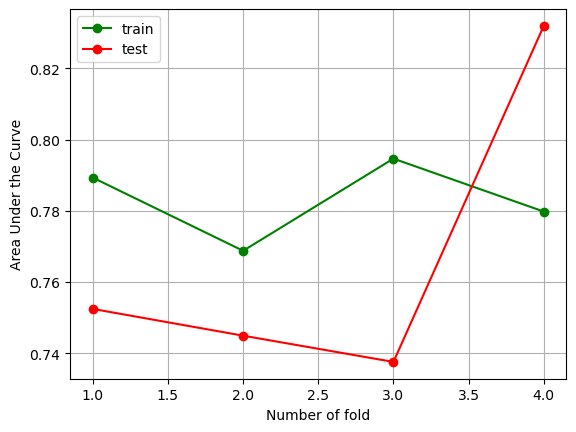

In [78]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [79]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=0.01, probability = True)

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(Z, Y, test_size = 0.3, random_state = 0)

model.fit(X_train, y_train)

y_predict_training = model.predict(X_train)
y_pred = model.predict(X_test)
#summery of training accuracy by the classifier
print("Logistic Regression Algorithm in training")
print(classification_report(y_train, y_predict_training))
print(confusion_matrix(y_train, y_predict_training))
print("ACC: ",accuracy_score(y_train, y_predict_training))
print("AUC: ",roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
print("ACC: ",accuracy_score(y_pred,y_test))
print("AUC: ",roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

Logistic Regression Algorithm in training
              precision    recall  f1-score   support

         0.0       0.79      0.70      0.74        86
         1.0       0.83      0.89      0.86       140

    accuracy                           0.81       226
   macro avg       0.81      0.79      0.80       226
weighted avg       0.81      0.81      0.81       226

[[ 60  26]
 [ 16 124]]
ACC:  0.8141592920353983
AUC:  0.8833056478405317
Decision Tree Algorithm
              precision    recall  f1-score   support

         0.0       0.72      0.53      0.61        43
         1.0       0.70      0.84      0.76        55

    accuracy                           0.70        98
   macro avg       0.71      0.69      0.69        98
weighted avg       0.71      0.70      0.70        98

[[23 20]
 [ 9 46]]
ACC:  0.7040816326530612
AUC:  0.7763213530655391


In [81]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=4)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = svm.SVC(kernel='linear', C=0.01, probability = True)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

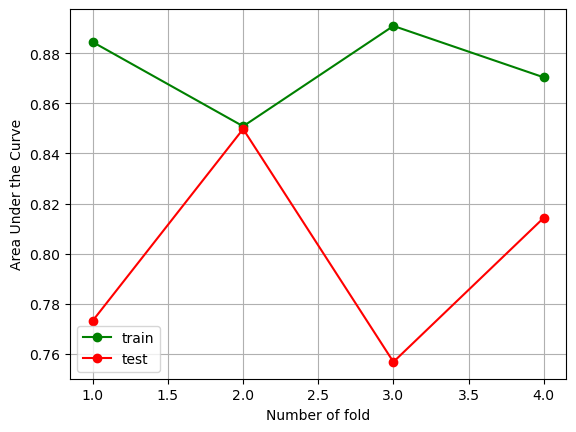

In [82]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()

In [83]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
svc = svm.SVC(probability=True)
grid_search=GridSearchCV(estimator=svc,param_grid=param_grid,cv=10,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0

[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=10, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=2)

In [84]:
grid_search.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [85]:
grid_search.best_estimator_

SVC(C=100, gamma=0.001, probability=True)

In [86]:
from sklearn.metrics import roc_curve, roc_auc_score
best_grid = grid_search.best_estimator_
y_train_pred = best_grid.predict(X_train)
y_pred=best_grid.predict(X_test)
print("SVM Training Result")
print(confusion_matrix(y_train,y_train_pred))
print("Auc Score {}".format(roc_auc_score(y_train, best_grid.predict_proba(X_train)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_train,y_train_pred)))
print("Classification report: {}".format(classification_report(y_train,y_train_pred)))

print("SVM Testing Result")
print(confusion_matrix(y_test,y_pred))
print("Auc Score {}".format(roc_auc_score(y_test, best_grid.predict_proba(X_test)[:,1])))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

SVM Training Result
[[ 99   1]
 [  0 143]]
Auc Score 1.0
Accuracy Score 0.9958847736625515
Classification report:               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       100
         1.0       0.99      1.00      1.00       143

    accuracy                           1.00       243
   macro avg       1.00      0.99      1.00       243
weighted avg       1.00      1.00      1.00       243

SVM Testing Result
[[25  4]
 [15 37]]
Auc Score 0.7692307692307693
Accuracy Score 0.7654320987654321
Classification report:               precision    recall  f1-score   support

         0.0       0.62      0.86      0.72        29
         1.0       0.90      0.71      0.80        52

    accuracy                           0.77        81
   macro avg       0.76      0.79      0.76        81
weighted avg       0.80      0.77      0.77        81



In [87]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, roc_auc_score
kf = KFold(n_splits=5)
auc_train = []
auc_test = []
for train_index, test_index in kf.split(Z): 
    X_train, X_test = Z[train_index], Z[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    model = best_grid
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    auc_train.append(roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    auc_test.append(roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

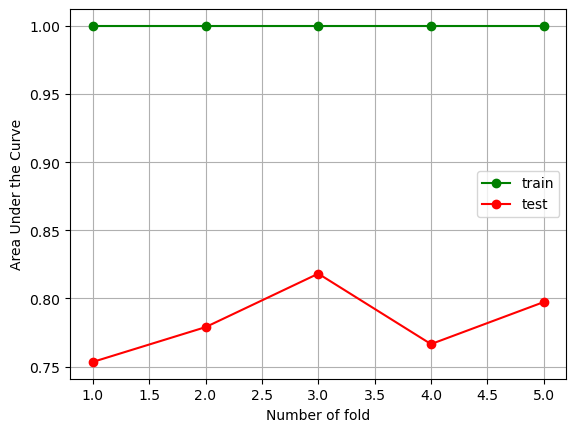

In [88]:
folds = range(1, kf.get_n_splits() + 1)
plt.plot(folds, auc_train, 'o-', color='green', label='train')
plt.plot(folds, auc_test, 'o-', color='red', label='test')
plt.legend()
plt.grid()
plt.xlabel('Number of fold')
plt.ylabel('Area Under the Curve')
plt.show()